In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


In [4]:
import pandas as pd

# Read the text file
                   
df = pd.read_csv('../DataCollection/Calibration_2_1_2024/Calibration_2_1_2024_2.txt')  # replace '\t' with your delimiter

# Save the DataFrame as a CSV file
df.to_csv('../DataCollection/Calibration_2_1_2024/Calibration_2_1_2024_2.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame

,Timestamp,Mode,Data
0,14:37:43.684,RX,Differential Pressure values:
1,14:37:43.684,RX,50.54
2,14:37:43.684,RX,Pressure values:
3,14:37:43.684,RX,9918.00
4,14:37:43.834,RX,Differential Pressure values:


In [5]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
df['differential pressure value'] = np.where(df['Data'] == 'Differential Pressure values:', df['Data'].shift(-1), np.nan)
df['pressure values'] = np.where(df['Data'] == 'Pressure values:', df['Data'].shift(-1), np.nan)

# Fill NaN values
df['differential pressure value'].fillna(method='ffill', inplace=True)
df['pressure values'].fillna(method='ffill', inplace=True)

In [6]:
df.head(100)  # prints the first 5 rows of the DataFrame

,Timestamp,Mode,Data,differential pressure value,pressure values
0,14:37:43.684,RX,Differential Pressure values:,50.54,NaN
1,14:37:43.684,RX,50.54,50.54,NaN
2,14:37:43.684,RX,Pressure values:,50.54,9918.00
3,14:37:43.684,RX,9918.00,50.54,9918.00
4,14:37:43.834,RX,Differential Pressure values:,50.54,9918.00
...,...,...,...,...,...
95,14:37:47.167,RX,9918.00,50.74,9918.00
96,14:37:47.315,RX,Differential Pressure values:,50.64,9918.00
97,14:37:47.315,RX,50.64,50.64,9918.00
98,14:37:47.315,RX,Pressure values:,50.64,9918.00


In [7]:

# Assuming df is your DataFrame

# Find rows where any cell has a NaN value
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)
# Drop rows where any cell has a NaN value
df = df.dropna()

      Timestamp Mode                           Data  \
0  14:37:43.684   RX  Differential Pressure values:   
1  14:37:43.684   RX                          50.54   

  differential pressure value pressure values  
0                       50.54             NaN  
1                       50.54             NaN  


In [8]:
df.head()

,Timestamp,Mode,Data,differential pressure value,pressure values
2,14:37:43.684,RX,Pressure values:,50.54,9918.00
3,14:37:43.684,RX,9918.00,50.54,9918.00
4,14:37:43.834,RX,Differential Pressure values:,50.54,9918.00
5,14:37:43.836,RX,50.54,50.54,9918.00
6,14:37:43.836,RX,Pressure values:,50.54,9917.90


In [9]:
df.tail()

,Timestamp,Mode,Data,differential pressure value,pressure values
12075,14:45:19.510,RX,9939.50,72.14,9939.50
12076,14:45:19.658,RX,Differential Pressure values:,72.24,9939.50
12077,14:45:19.660,RX,72.24,72.24,9939.50
12078,14:45:19.690,RX,Pressure values:,72.24,9939.40
12079,14:45:19.690,RX,9939.40,72.24,9939.40


In [10]:

df.to_csv('../DataCollection/Calibration_2_1_2024/Calibration_2_1_2024.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame 

,Timestamp,Mode,Data,differential pressure value,pressure values
2,14:37:43.684,RX,Pressure values:,50.54,9918.00
3,14:37:43.684,RX,9918.00,50.54,9918.00
4,14:37:43.834,RX,Differential Pressure values:,50.54,9918.00
5,14:37:43.836,RX,50.54,50.54,9918.00
6,14:37:43.836,RX,Pressure values:,50.54,9917.90


In [11]:
df.tail()

,Timestamp,Mode,Data,differential pressure value,pressure values
12075,14:45:19.510,RX,9939.50,72.14,9939.50
12076,14:45:19.658,RX,Differential Pressure values:,72.24,9939.50
12077,14:45:19.660,RX,72.24,72.24,9939.50
12078,14:45:19.690,RX,Pressure values:,72.24,9939.40
12079,14:45:19.690,RX,9939.40,72.24,9939.40


In [12]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])



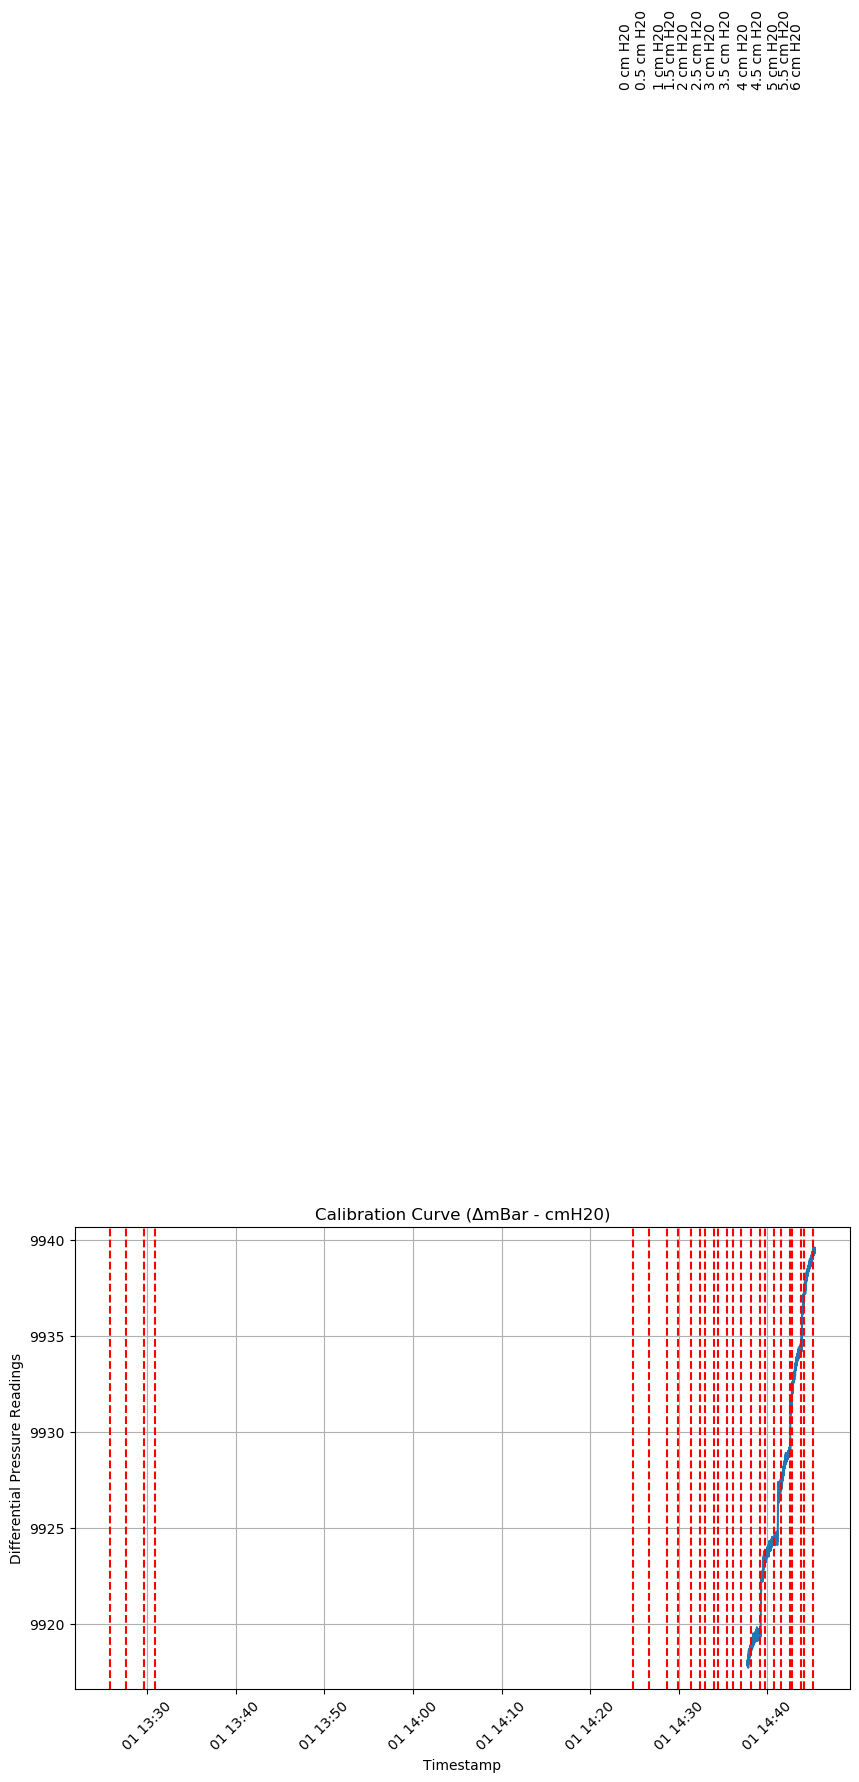

In [14]:

# Define start and end time
start_time = pd.to_datetime('14:37:43')
end_time = pd.to_datetime('14:45:19')

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'] >= start_time) & (filtered_df['Timestamp'] <= end_time)]

filtered_df = filtered_df.copy()
# Now you can modify 'pressure values' without warnings
filtered_df.loc[:, 'pressure values'] = pd.to_numeric(filtered_df['pressure values'], errors='coerce')

# Define the times to plot vertical lines at
times = ['14:24:50', '13:25:50',
         '14:26:36', '13:27:36',
         '14:28:40', '13:29:40',
         '14:29:52', '13:30:52',
         '14:31:21', '14:32:21',
         '14:33:00', '14:34:00',
         '14:34:27', '14:35:27',
         '14:36:04', '14:37:04',
         '14:38:08', '14:39:08',
         '14:39:42', '14:40:42',
         '14:41:30', '14:42:30',
         '14:42:49', '14:43:49',
         '14:44:09', '14:45:09']
labels = ['0 cm H20',
          '0.5 cm H20',
          '1 cm H20',
          '1.5 cm H20',
          '2 cm H20',
          '2.5 cm H20',
          '3 cm H20',
          '3.5 cm H20',
          '4 cm H20',
          '4.5 cm H20',
          '5 cm H20',
          '5.5 cm H20',
          '6 cm H20']

# Convert the times to datetime
times = [pd.to_datetime(t) for t in times]

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 6))

# Plot 'Data' against 'Timestamp'
plt.plot(filtered_df['Timestamp'], filtered_df['pressure values'])

# Plot vertical lines at the specified times
for i, t in enumerate(times):
    plt.axvline(x=t, color='r', linestyle='--')
    if i % 2 == 0:  # for the first, third, fifth, etc. lines
        plt.text(t, 10000, labels[i//2], rotation=90, va='bottom', ha='right')  # adjust -5 and 'bottom' as needed

# Set the title and labels
plt.title('Calibration Curve (ΔmBar - cmH20)')
plt.xlabel('Timestamp')
plt.ylabel('Differential Pressure Readings')

# Adjust the spacing of the labels
plt.xticks(rotation=45)

# Set the y-axis limits to cover the entire range
#plt.ylim(float('-5'), float('90'))

# Add a grid
plt.grid(True)

plt.savefig('Calibration_2_1_2024.png')
# Show the plot
plt.show()

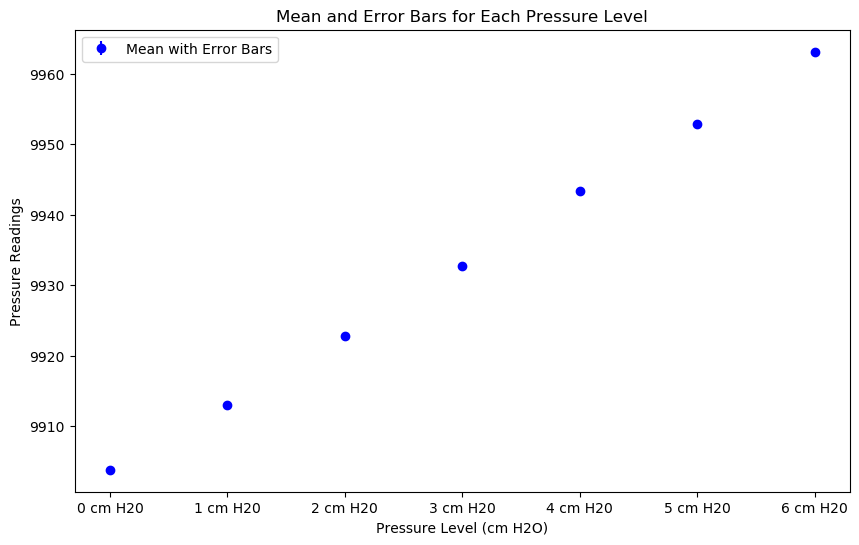

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filtered_df' is the DataFrame containing your data
# ...

# Define start and end time
start_time = pd.to_datetime('15:35:00')
end_time = pd.to_datetime('15:47:53')

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'] >= start_time) & (filtered_df['Timestamp'] <= end_time)]

# Convert 'differential pressure value' to numeric, handling errors
filtered_df.loc[:, 'pressure values'] = pd.to_numeric(filtered_df['pressure values'], errors='coerce')

# Define the times to plot vertical lines at
times = ['15:35:00', '15:36:00', '15:36:53', '15:37:53', '15:39:22', '15:40:22', '15:41:11', '15:42:11', '15:43:14', '15:44:14', '15:44:59', '15:45:59', '15:46:43', '15:47:43']
labels = ['0 cm H20', '1 cm H20', '2 cm H20', '3 cm H20', '4 cm H20', '5 cm H20', '6 cm H20']

# Convert the times to datetime
times = [pd.to_datetime(t) for t in times]

# Initialize lists to store mean and std values for each pressure level
mean_values = []
std_values = []

# Loop through each pressure level
for i in range(0, len(times)-1, 2):
    # Filter data for the specific time interval
    pressure_level_data = filtered_df[(filtered_df['Timestamp'] >= times[i]) & (filtered_df['Timestamp'] <= times[i+1])]
    
    # Calculate mean and std for the filtered data
    mean_value = pressure_level_data['pressure values'].mean()
    std_value = pressure_level_data['pressure values'].std()
    
    # Append mean and std values to the lists
    mean_values.append(mean_value)
    std_values.append(std_value)

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 6))

# Plot mean values with error bars
plt.errorbar(labels, mean_values, yerr=std_values, fmt='o', color='b', label='Mean with Error Bars')

# Set the title and labels
plt.title('Mean and Error Bars for Each Pressure Level')
plt.xlabel('Pressure Level (cm H2O)')
plt.ylabel('Pressure Readings')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Slope: 9.93
Intercept: 9903.32
R-squared: 0.9997


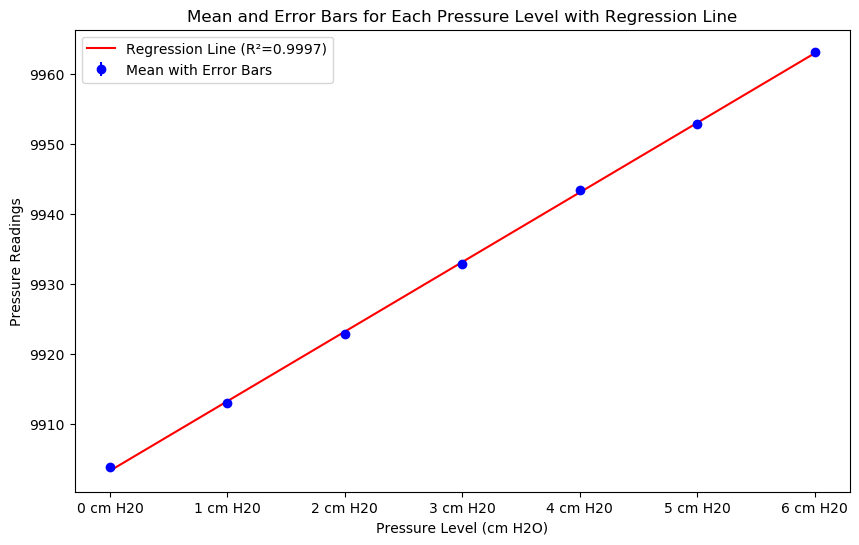

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Define start and end time
start_time = pd.to_datetime('15:35:00')
end_time = pd.to_datetime('15:47:53')

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'] >= start_time) & (filtered_df['Timestamp'] <= end_time)]

# Convert 'differential pressure value' to numeric, handling errors
filtered_df.loc[:, 'pressure values'] = pd.to_numeric(filtered_df['pressure values'], errors='coerce')

# Define the times to plot vertical lines at
times = ['15:35:00', '15:36:00', '15:36:53', '15:37:53', '15:39:22', '15:40:22', '15:41:11', '15:42:11', '15:43:14', '15:44:14', '15:44:59', '15:45:59', '15:46:43', '15:47:43']
labels = ['0 cm H20', '1 cm H20', '2 cm H20', '3 cm H20', '4 cm H20', '5 cm H20', '6 cm H20']

# Convert the times to datetime
times = [pd.to_datetime(t) for t in times]

# Initialize lists to store mean and std values for each pressure level
mean_values = []
std_values = []

# Loop through each pressure level
for i in range(0, len(times)-1, 2):
    # Filter data for the specific time interval
    pressure_level_data = filtered_df[(filtered_df['Timestamp'] >= times[i]) & (filtered_df['Timestamp'] <= times[i+1])]
    
    # Calculate mean and std for the filtered data
    mean_value = pressure_level_data['pressure values'].mean()
    std_value = pressure_level_data['pressure values'].std()
    
    # Append mean and std values to the lists
    mean_values.append(mean_value)
    std_values.append(std_value)

# Perform linear regression to fit a line
slope, intercept, r_value, p_value, std_err = linregress(range(len(labels)), mean_values)

# Calculate R-squared
r_squared = r_value**2

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 6))

# Plot mean values with error bars
plt.errorbar(labels, mean_values, yerr=std_values, fmt='o', color='b', label='Mean with Error Bars')

# Plot the regression line
plt.plot(labels, [intercept + slope * i for i in range(len(labels))], color='r', label=f'Regression Line (R²={r_squared:.4f})')

# Set the title and labels
plt.title('Mean and Error Bars for Each Pressure Level with Regression Line')
plt.xlabel('Pressure Level (cm H2O)')
plt.ylabel('Pressure Readings')

# Add a legend
plt.legend()



# Display the calculated values
print(f'Slope: {slope:.2f}')
print(f'Intercept: {intercept:.2f}')
print(f'R-squared: {r_squared:.4f}')


plt.savefig('Calibration_1_30_2024_2.png')

plt.show()